# Count Data Regression Models

## Types of Count Data Regressions

1. Poisson Regression
2. Negative Binomial Regression
3. Hurdle Models
4. Zero-Inflated Count Models
    * Zero-inflated Poisson
    * Zero-inflated Negative Binomial
5. Zero-Truncated Count Models
    * Zero-truncated Poisson
    * Zero-truncated Negative Binomial
6. Random-effects Count Models

In [1]:
import os
import math
import itertools
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold, train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns

from helper_functions import cv_model, oos_stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

next_df = pd.read_csv('preprocessed_data')

# Poisson Regression

* Two problems when applying a linear regression to count data. 1. Many distributions of count data is positively skewed with the majority of observations being 0. 2. The linear regression could produce negative values which would be impossible (Martin). Need to check if old models actually did this
* Using a Poisson Regression has several benefits "a skew, discrete distribution, and the restriction of predicted values to non-negative numbers." Poisson has two main differences from linear regression: it assumes the errors follow a poisson distribution. "Second, rather than modeling Y as a linear function of the regression coefficients, it models the natural log of the response variable, ln(Y), as a linear function of the coefficients (Martin). So instead of y = mx + b our regression would have ln(y) = mx + b
* Poisson model assumes mean is equal to the variance of the errors but often the variance of the errors is larger (Martin).

# Poisson Regression Assumptions

1. Poisson Response The response variable is a count per unit of time or space, described by a Poisson distribution.
2. Independence The observations must be independent of one another.
3. Mean=Variance By definition, the mean of a Poisson random variable must be equal to its variance.
4. Linearity The log of the mean rate, log(λ), must be a linear function of x. (Bostock)

We will look at these assumptions one by one to see if a poisson regression might be a better fit for our goal prediction model than our OLS and regularized linear regressions from the last article. If any of the assumptions fail we'll move on to the next model

# Poisson Response

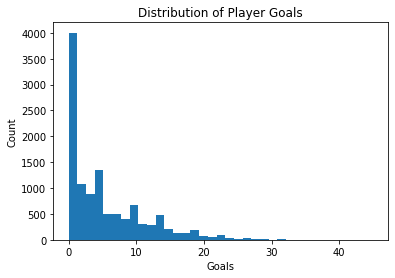

In [32]:
plt.hist(next_df['g'], bins=35)
plt.xlabel("Goals")
plt.ylabel("Count")
plt.title("Distribution of Player Goals")
plt.show()

# Mean/Variance Equality 

In [22]:
print(f"Goals Mean: {next_df['g'].mean()}")
print(f"Goals Variance: {next_df['g'].var()}")

Goals Mean: 5.275050122036262
Goals Variance: 33.751469966443096


# Training the Poisson Regression

In [5]:
feature_columns = [
                   'g', 'a1', 'a2', 'toi', 'gp', 'isf', 'iff', 'g_pp', 'a1_pp', 'a2_pp',
                   'toi_pp', 'isf_pp', 'iff_pp', 'pos_D',
                   'pos_D/F', 'pos_F', 'toi_gp', 'sh_percent', 'sh_percent_pp', 'avg_goals_season', 
                   'avg_sh_perc', 'sh_perc_diff', 'g_avg_past_2_seasons'] 
target_column = ['total_goals_next']
selected_features = ['g', 'g_pp', 'isf', 'toi_pp', 'isf_pp', 'avg_goals_season', 'g_avg_past_2_seasons',
                     'pos_F', 'gp', 'a1']
x_train, x_test, y_train, y_test = train_test_split(next_df[feature_columns], 
                                                    next_df[['total_goals_next']], 
                                                    test_size=0.2, random_state=8675309)

In [27]:
#Have to scale like Ridge Regression
#TODO build function or improve my old one to work with Poisson Regressions
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train[selected_features])
scaled_features = scaler.transform(x_train[selected_features])
poisson_reg = PoissonRegressor(max_iter=5000)
poisson_reg.fit(scaled_features, y_train.values[:,0])

PoissonRegressor(max_iter=5000)

In [28]:
poisson_reg.score(scaled_features, y_train.values[:,0])

0.481622798340403

# Sources

Regression Models for Count Data by Karen Grace-Martin
https://www.theanalysisfactor.com/regression-models-for-count-data/

Broadening Your Statistical Horizons: Generalized Linear Models and Multilevel Models
Julie Legler and Paul Roback
https://bookdown.org/roback/bookdown-bysh/ch-poissonreg.html

Regression Models with Count Data by UCLA Statistical Consulting
https://stats.idre.ucla.edu/stata/seminars/regression-models-with-count-data/

An Illustrated Guid to the Poisson Regression Model by Sachin Date
https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958

Negative Binomial Regression: A Step by Step Guide by Sachin Date
https://towardsdatascience.com/negative-binomial-regression-f99031bb25b4